In [ ]:
# Caroline Martin
# 100 nm gold data analysis
# December 2017

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import scipy.optimize

%matplotlib inline 

import emcee

import seaborn as sns
import pandas as pd

# Applying different models to autocorrelation function, including simple exponential and Bayesian model to fitting an exponential decay.

In [2]:
dls_data = np.loadtxt("100nm.dat", skiprows=1)

# Data is in columns based on angle the data is taken at. The first row labels these columns

tau = dls_data[:,0]
intensity_20 = dls_data[:,1]
intensity_40 = dls_data[:,2]
intensity_60 = dls_data[:,3]
intensity_80 = dls_data[:,4]
intensity_100 = dls_data[:,5]
intensity_120 = dls_data[:,6]
intensity_140 = dls_data[:,7]
intensity_160 = dls_data[:,8]

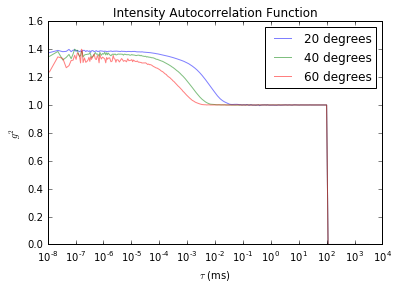

In [3]:
# Graph the tau vs. intensity autocorrelation function
# Plot tau on a log plot

# First graph the first 3 to see if the data looks right
plt.semilogx(tau, intensity_20, alpha = 0.5, label= "20 degrees")
plt.semilogx(tau, intensity_40, alpha = 0.5, label= "40 degrees")
plt.semilogx(tau, intensity_60, alpha = 0.5, label= "60 degrees")
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')
plt.legend()

In [4]:
# Since there's very obviously something going on at long times, trim the data to get rid of that sharp drop. 
# This is when the instrument has simply stopped taking data, so it drops abruptly to 0
# Get rid of the last 40 points
intensity_20 = intensity_20[:(len(intensity_20)-40)]
intensity_40 = intensity_40[:(len(intensity_40)-40)]
intensity_60 = intensity_60[:(len(intensity_60)-40)]
intensity_80 = intensity_80[:(len(intensity_80)-40)]
intensity_100 = intensity_100[:(len(intensity_100)-40)]
intensity_120 = intensity_120[:(len(intensity_120)-40)]
intensity_140 = intensity_140[:(len(intensity_140)-40)]
intensity_160 = intensity_160[:(len(intensity_160)-40)]

tau = tau[:(len(tau)-40)]

(1e-07, 1)

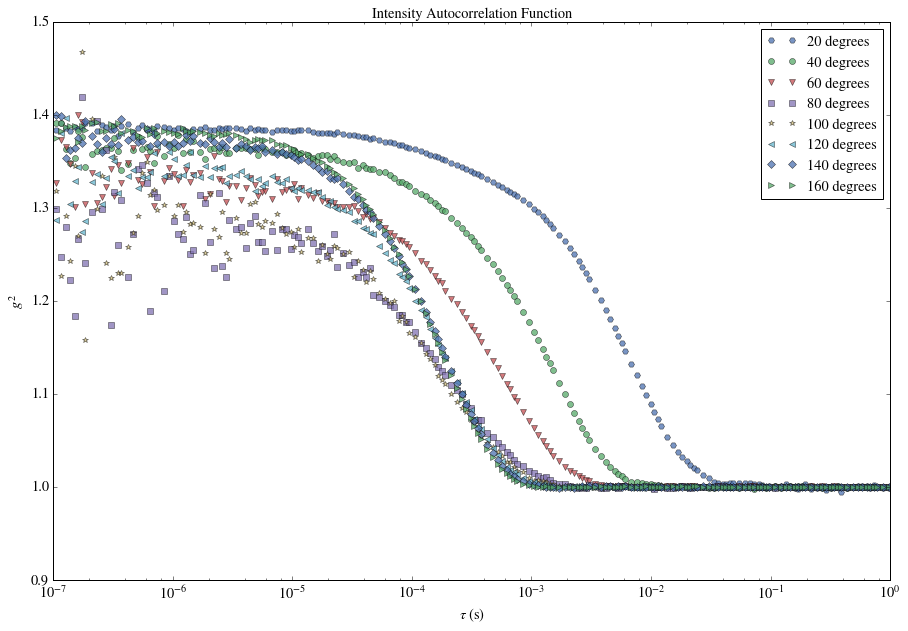

In [28]:
# Now plot all of the data together, to look at the overall trends
fig = plt.figure(figsize = (15, 10))
plt.style.use('seaborn-deep')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.semilogx(tau, intensity_20, "H", alpha = 0.75, label= "20 degrees")
plt.semilogx(tau, intensity_40, "o", alpha = 0.75, label= "40 degrees")
plt.semilogx(tau, intensity_60, "v", alpha = 0.75, label= "60 degrees")
plt.semilogx(tau, intensity_80, "s", alpha = 0.75, label= "80 degrees")
plt.semilogx(tau, intensity_100, "*", alpha = 0.75, label= "100 degrees")
plt.semilogx(tau, intensity_120, "<", alpha = 0.75, label= "120 degrees")
plt.semilogx(tau, intensity_140, "D", alpha = 0.75, label= "140 degrees")
plt.semilogx(tau, intensity_160, ">", alpha = 0.75, label= "160 degrees")
plt.title("Intensity Autocorrelation Function")
plt.xlabel(r'$\tau $ (s)')
plt.ylabel(r'$g^2$')
plt.legend()
plt.xlim(10**-7, 1)

[ 166.88847569    0.37613228    1.00181931]


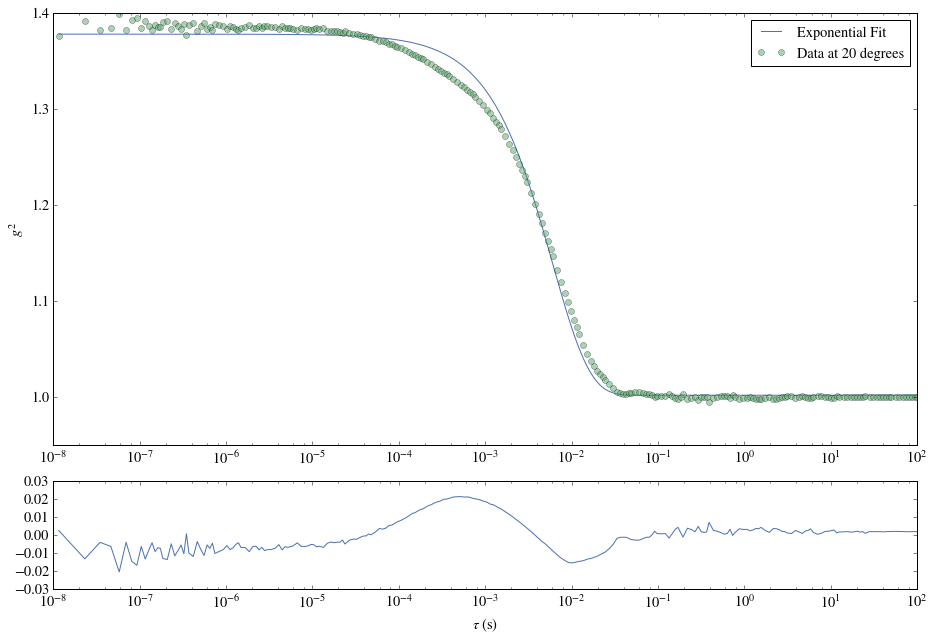

In [29]:
# Line of best fit with standard least square fit
# General model is of exponential decay

def fitmodel(t, C, A, B):
    return A*np.e**(-C*t) + B

popt1, pcov1 = scipy.optimize.curve_fit(fitmodel, tau, intensity_20)
print popt1

fig1 = plt.figure(figsize = (15, 10))
frame1=fig1.add_axes((.1,.3,.8,.6))

# Plot line of fit and raw data
plt.semilogx(tau, fitmodel(tau, popt1[0], popt1[1], popt1[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_20, 'o', alpha = 0.5, label= "Data at 20 degrees")

#plt.title("Intensity Autocorrelation Function- 20 Degrees")
plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig1.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt1[0], popt1[1], popt1[2]) - intensity_20
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')

In [8]:
# This is obviously a weird fit. It doesn't look that good, which implies that the single exponential is not the best 
# way to describe this data. Look at more fits to see if that's the case.

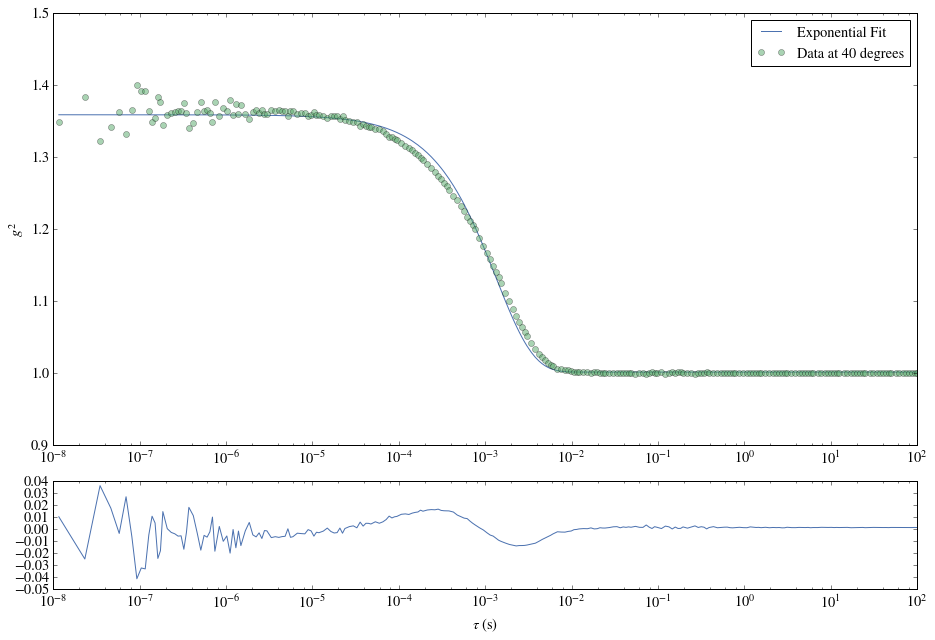

In [30]:
# Plot 40 degress using the same model of least square fits.
popt2, pcov2 = scipy.optimize.curve_fit(fitmodel, tau, intensity_40)

fig2 = plt.figure(figsize = (15, 10))
frame1=fig2.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, popt2[0], popt2[1], popt2[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_40, 'o', alpha = 0.5, label= "Data at 40 degrees")

#plt.title("Intensity Autocorrelation Function- 40 Degrees")
plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig2.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt2[0], popt2[1], popt2[2]) - intensity_40
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')


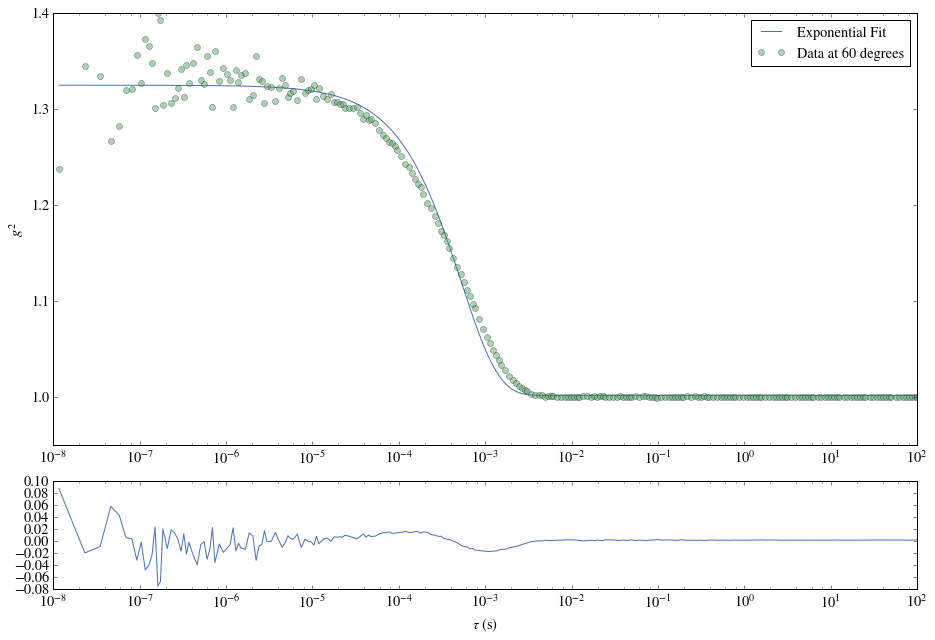

In [31]:
# Plot 60 degrees
popt3, pcov3 = scipy.optimize.curve_fit(fitmodel, tau, intensity_60)

fig3 = plt.figure(figsize = (15, 10))
frame1=fig3.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, popt3[0], popt3[1], popt3[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_60, 'o', alpha = 0.5, label= "Data at 60 degrees")

#plt.title("Intensity Autocorrelation Function- 60 Degrees")

plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig3.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt3[0], popt3[1], popt3[2]) - intensity_60
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')

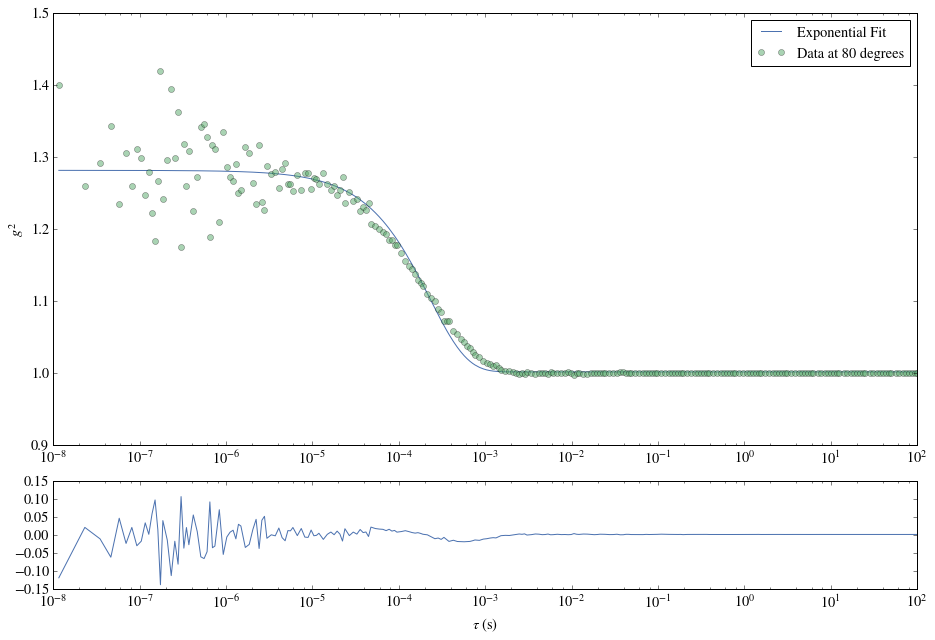

In [33]:
# 80 degrees
popt4, pcov4 = scipy.optimize.curve_fit(fitmodel, tau, intensity_80)

fig4 = plt.figure(figsize = (15, 10))
frame1=fig4.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, popt4[0], popt4[1], popt4[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_80, 'o', alpha = 0.5, label= "Data at 80 degrees")

#plt.title("Intensity Autocorrelation Function- 80 Degrees")
plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig4.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt4[0], popt4[1], popt4[2]) - intensity_80
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')

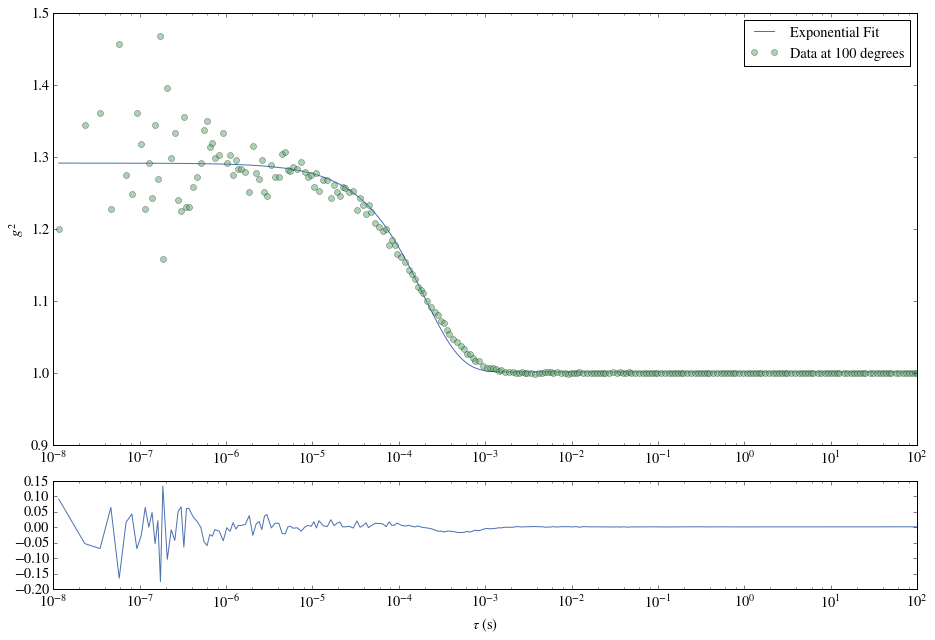

In [34]:
# 100 degrees
popt5, pcov5 = scipy.optimize.curve_fit(fitmodel, tau, intensity_100)

fig5 = plt.figure(figsize = (15, 10))
frame1=fig5.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, popt5[0], popt5[1], popt5[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_100, 'o', alpha = 0.5, label= "Data at 100 degrees")

#plt.title("Intensity Autocorrelation Function- 100 Degrees")
plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig5.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt5[0], popt5[1], popt5[2]) - intensity_100
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')

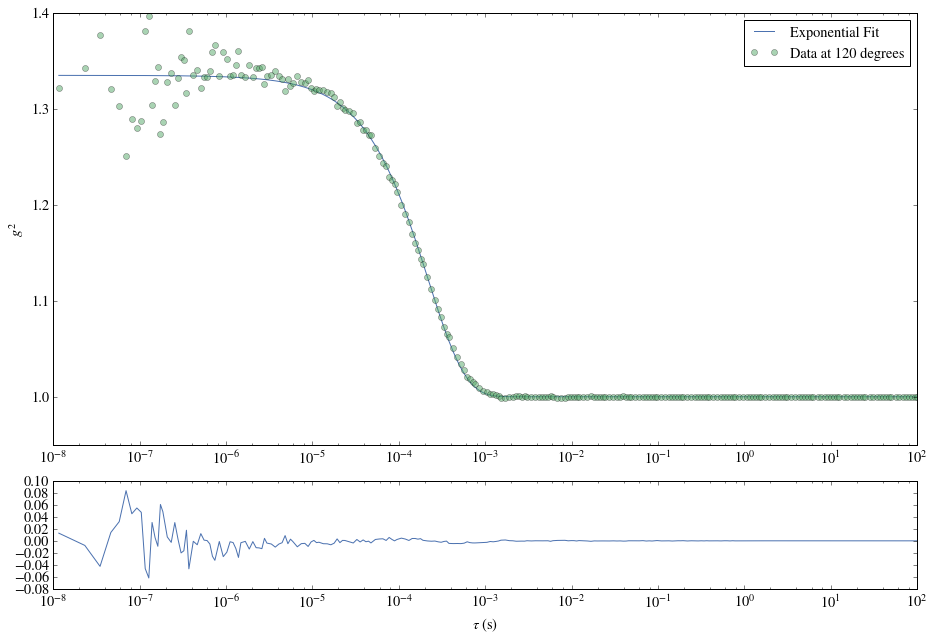

In [35]:
# 120 degrees
popt6, pcov6 = scipy.optimize.curve_fit(fitmodel, tau, intensity_120)

fig6 = plt.figure(figsize = (15, 10))
frame1=fig6.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, popt6[0], popt6[1], popt6[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_120, 'o', alpha = 0.5, label= "Data at 120 degrees")

#plt.title("Intensity Autocorrelation Function- 120 Degrees")

plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig6.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt6[0], popt6[1], popt6[2]) - intensity_120
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')

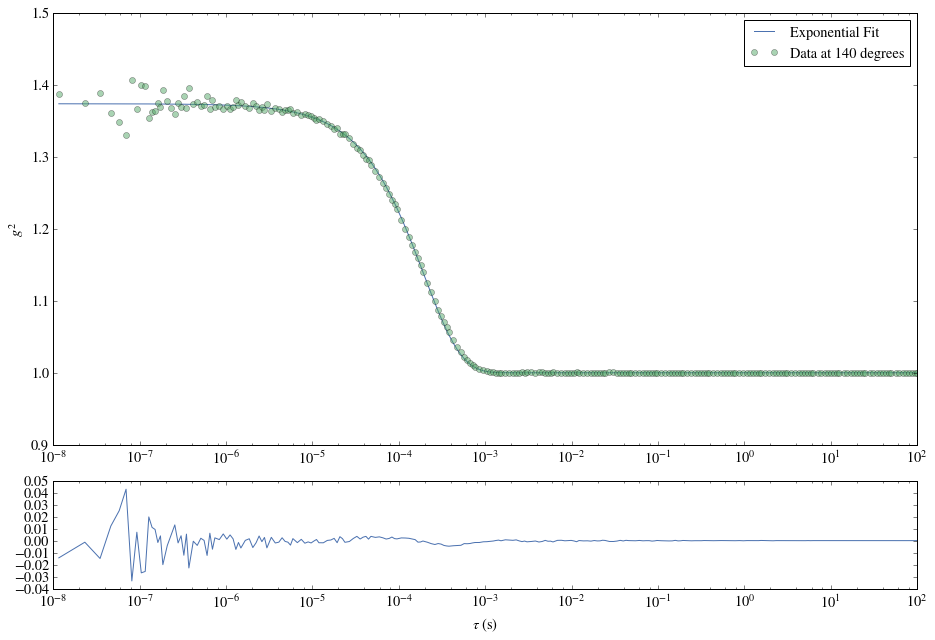

In [36]:
# 140 degrees
popt7, pcov7 = scipy.optimize.curve_fit(fitmodel, tau, intensity_140)

fig7 = plt.figure(figsize = (15, 10))
frame1=fig7.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, popt7[0], popt7[1], popt7[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_140, 'o', alpha = 0.5, label= "Data at 140 degrees")

#plt.title("Intensity Autocorrelation Function- 140 Degrees")

plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig7.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt7[0], popt7[1], popt7[2]) - intensity_140
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')

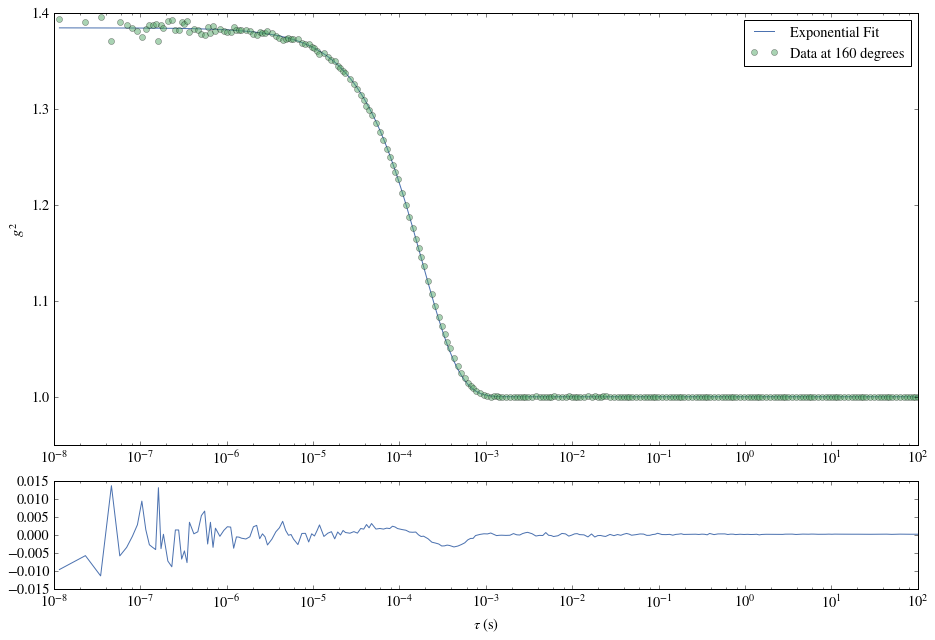

In [37]:
# 160 degrees
popt8, pcov8 = scipy.optimize.curve_fit(fitmodel, tau, intensity_160)

fig8 = plt.figure(figsize = (15, 10))
frame1=fig8.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, popt8[0], popt8[1], popt8[2]), label='Exponential Fit')
plt.semilogx(tau, intensity_160, 'o', alpha = 0.5, label= "Data at 160 degrees")

#plt.title("Intensity Autocorrelation Function- 160 Degrees")

plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig8.add_axes((.1,.1,.8,.15))
residuals = fitmodel(tau, popt8[0], popt8[1], popt8[2]) - intensity_160
plt.semilogx(tau, residuals)
plt.xlabel(r'$\tau $ (s)')

In [16]:
# The residuals seem to be worst at small angles. Possibility is aggregations, since aggregated particles scatter
# strongly in the forward direction.

In [38]:
# Determine the diffusion constant D using these least square fits.

# Data taken at a scattering angle of 20 degrees with a 532 nm laser.

lam = 658e-9 # wavelength in meters
theta = 20.74*(np.pi/180) # scattering angle in radians
n = 1.333 # refractive index


q = ((4*np.pi * n) /(lam)) * np.sin(theta/2)

C = popt1[0] # exponetial constant from fit
D = (C / q**2) # Diffusion constant in units of m^2 / s
print "Diffusion coefficient: " , D 

# To find the radius, use the relationship D = kT/(6*pi*eta*R) 

k = 1.38065e-23 # Boltzmann's constant, J/K (joules per kelvin)
T = 293.08 # Kelvin, roomtemp
eta = 10.016e-4 # viscosity of water, Pa s (pascal seconds) at temperature of 293.08 Kelvin

R = k*T / (6*np.pi*eta*D)
print "Radius: ", R



Diffusion coefficient:  7.947548729e-12
Radius:  2.69675282134e-08


In [39]:
fits = np.array([popt1[0], popt2[0], popt3[0], popt4[0], popt5[0], popt6[0], popt7[0], popt8[0]])
print fits

amplitude = fits = np.array([popt1[1], popt2[1], popt3[1], popt4[1], popt5[1], popt6[1], popt7[1], popt8[1]])
print amplitude

print np.mean(amplitude)

[  166.88847569   749.82546645  1898.60766362  4405.48368139  5163.63633749
  4599.22055234  5152.81978904  5453.74173455]
[ 0.37613228  0.35741413  0.32328778  0.27997414  0.2900637   0.33476767
  0.37360683  0.38428845]
0.339941872197


[  20.74   40.28   60.18   80.08   99.92  119.82  139.72  159.26]
[  166.88847569   749.82546645  1898.60766362  4405.48368139  5163.63633749
  4599.22055234  5152.81978904  5453.74173455]


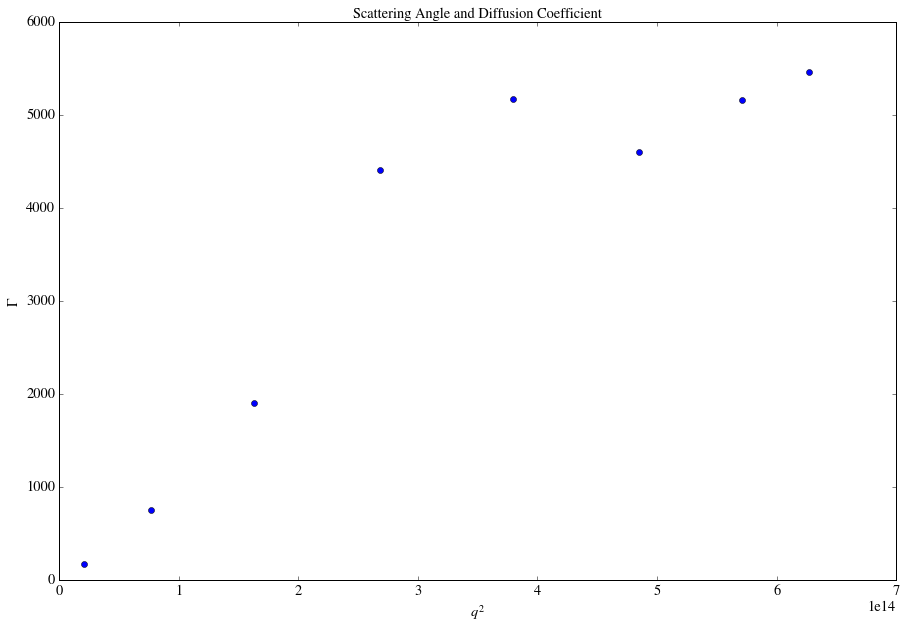

In [40]:
# Attempt to make a plot of linear relationship between q^2 and fit constant to find D

#Load in the angles
dls_data = np.loadtxt("100nm.dat", usecols=(1,2,3,4,5,6,7,8))
theta = dls_data[0,:]
print theta
theta = theta*(np.pi/180) # scattering angle in radians

# Find q
q = ((4*np.pi * n) /(lam)) * np.sin(theta/2)

# Graph the extracted fits vs. q^2
fits = np.array([popt1[0], popt2[0], popt3[0], popt4[0], popt5[0], popt6[0], popt7[0], popt8[0]])
print fits

fig = plt.figure(figsize = (15, 10))
plt.plot(q**2, fits, 'bo')
plt.xlabel(r'$q^2 $ ')
plt.ylabel(r'$\Gamma $')
plt.title("Scattering Angle and Diffusion Coefficient")

In [41]:
def straight_line_model(x, A, B):
    '''
    Model function for a straight-line fit with y-intercept A and slope B.
    '''
    return A + B * x
x = q**2
y = fits
popt, pcov = scipy.optimize.curve_fit(straight_line_model, x, y)
print('best-fit parameters: ', popt)
print('covariance matrix: ')
popt_uncertainties = np.sqrt(np.diag(pcov))
print 'uncertainties: ', popt_uncertainties

('best-fit parameters: ', array([  6.28912514e+02,   8.70222168e-12]))
covariance matrix: 
uncertainties:  [  5.86488607e+02   1.51174673e-12]


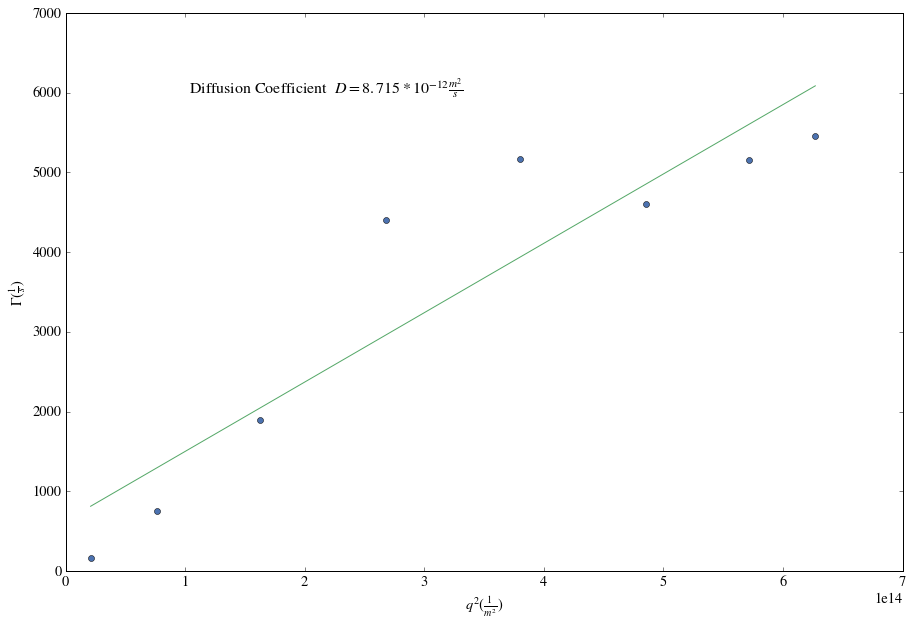

In [52]:
best_fit_line = straight_line_model(x, popt[0], popt[1])

fig = plt.figure(figsize = (15, 10))

plt.plot(x, y, 'o')
plt.plot(x, best_fit_line)
plt.text(1e14, 6000, r' Diffusion Coefficient  $D = 8.715 * 10^{-12} \frac{m^2}{s} $', fontsize = 16)
plt.xlabel(r'$q^2 (\frac{1}{m^{2}})$ ')
plt.ylabel(r'$\Gamma (\frac{1}{s} )$')
#plt.title("Scattering Angle and Diffusion Coefficient")

In [21]:
# To find the radius, use the relationship D = kT/(6*pi*eta*R)

k = 1.38065e-23 # Boltzmann's constant, J/K (joules per kelvin)
T = 293.08 # Kelvin, roomtemp
eta = 10.016e-4 # viscosity of water, Pa s (pascal seconds) at temperature of 293.08 Kelvin
D = popt[1]

R = k*T / (6*np.pi*eta*D)
print "Radius: ", R

Radius:  2.46288536867e-08


This is off by quite a bit. The gold particles had a diameter of 100 nm. 

## Applying Bayesian model to data analysis

In [22]:
# Apply this to 20 degree data first
# First, I need to assume uniformm error bars in the y direction. 
# Let's say that the intensity autocorrelation function has a constant uncertainty of +-5% of the value

sig_y = intensity_20*0.05

In [23]:
# Now define the log of the liklihood function using the assumption that the prior is equal probablity
def log_prior(theta):
    # returns log of prior probability distribution
    A, C, B = theta # unpack the model parameters
    return 0
    # Since the probability is a constant, this returns 0.
    
    
def log_likelihood(theta, x, y, sig_y):
    # returns the log of the likelihood function

    # theta: model parameters (specified as a tuple)
    # x: angles
    # y: measured tau
    # sig_y: uncertainties on measured data, set to be +- 5% of the value
    
    A, C, B = theta # unpack the model parameters
    
    # Using the model A*np.e**(-C*t) + B, define the log of the likelihood function as
    # ln (L) = K - 1/2 * Sum [(y- function)^2 / sigma^2] 
    # ln (L) = K - 1/2 Chi^2
    # Based on derivation in Hogg, Bovy, and Lang paper
    
    residual = (y - A*np.e**(-C*x) - B)**2
    chi_square = np.sum(residual/(sig_y**2))
    
    # the constant K is determined by the Gaussian function 
    constant = np.sum(np.log(1/np.sqrt(2.0*np.pi*sig_y**2)))
    return constant - 0.5*chi_square

def log_posterior(theta, x, y, sig_y):
    # returns log of posterior probability distribution
    A, C, B = theta
    
    # Bayes Theorem: Posterior = Prior * likelihood
    # Ln (Posterior) = Ln (Prior ) + Ln (Likelihood)
    return log_prior(theta) + log_likelihood(theta, x, y, sig_y)

In [25]:
# the model has 3 parameters; we'll use 50 walkers and 500 steps each
ndim = 3
nwalkers = 50
nsteps = 500

# set up the walkers in a "Gaussian ball" around the least-squares estimate
# The least squares fit estimate said that A is about 0.376, C is about 166.88847569, B is about 1
ls_result = [0.37613228, 166.88847569, 1] # A, C, B
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [26]:
# set up the sampler object using emcee
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_20, sig_y))


# run the sampler and use iPython's %time directive to tell us how long it took
%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

CPU times: user 1.27 s, sys: 10.9 ms, total: 1.28 s
Wall time: 1.3 s
Done


/Users/carolinemartin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


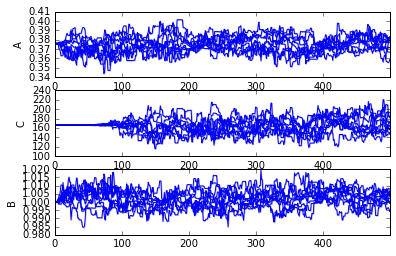

In [27]:
# Plot the movement of the walkers to see how long it takes before they settle into the minimum
fig, (ax_A, ax_C, ax_B) = plt.subplots(3)
ax_A.set(ylabel='A')
ax_C.set(ylabel='C')
ax_B.set(ylabel='B')
for i in range(10):
    sns.tsplot(sampler.chain[i,:,0], ax=ax_A)
    sns.tsplot(sampler.chain[i,:,1], ax=ax_C)
    sns.tsplot(sampler.chain[i,:,2], ax=ax_B)

In [29]:
# Since it takes about 100 steps for the walkers to settle, trim the data to include only steps after 100
samples = sampler.chain[:,100:,:]

# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T

# create a pandas DataFrame with labels.
parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

In [30]:
# calculate the MAP and values using pandas
q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

q

,A,B,C
0.16,0.367488,0.996415,148.425712
0.50,0.375633,1.001421,165.320817
0.84,0.383956,1.006500,183.787878


In [32]:
# Extract the data from this chart here to see the range of uncertainty on the values
print("A = {:.3f} + {:.3f} - {:.3f}".format(q['A'][0.50], 
                                            q['A'][0.84]-q['A'][0.50],
                                            q['A'][0.50]-q['A'][0.16]))
print("C = {:.3f} + {:.3f} - {:.3f}".format(q['C'][0.50], 
                                            q['C'][0.84]-q['C'][0.50],
                                            q['C'][0.50]-q['C'][0.16]))
print("B = {:.3f} + {:.3f} - {:.3f}".format(q['B'][0.50], 
                                            q['B'][0.84]-q['B'][0.50],
                                            q['B'][0.50]-q['B'][0.16]))

A = 0.376 + 0.008 - 0.008
C = 165.321 + 18.467 - 16.895
B = 1.001 + 0.005 - 0.005


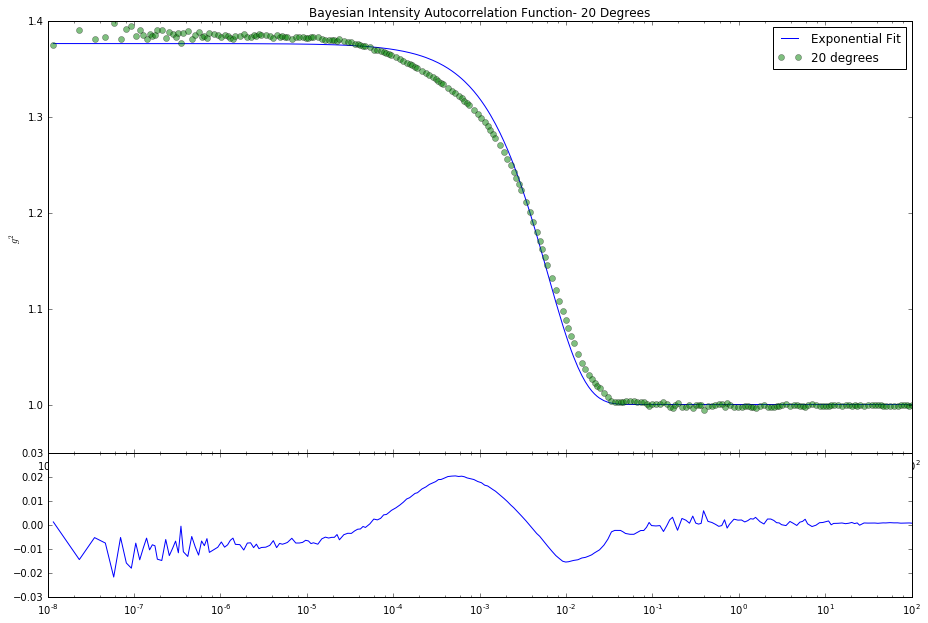

In [34]:
# Based on these values, we can say that for the measurements taken at 20 degrees
A = 0.376
C = 165.321
B = 1.001


# Plot these fits for the 20 degree data
fig1 = plt.figure(figsize = (15, 10))
frame1=fig1.add_axes((.1,.3,.8,.6))

plt.semilogx(tau, fitmodel(tau, C, A, B), label='Exponential Fit')
plt.semilogx(tau, intensity_20, 'o', alpha = 0.5, label= "20 degrees")

plt.title("Bayesian Intensity Autocorrelation Function- 20 Degrees")
plt.xlabel(r'$\tau $ (ms)')
plt.ylabel(r'$g^2$')
plt.legend()

# Plot the residuals
frame2=fig1.add_axes((.1,.1,.8,.2))
residuals = fitmodel(tau, C, A, B) - intensity_20
plt.semilogx(tau, residuals)

C_20 = C

In [ ]:
# The Bayesian method still encounters the problem with the fit, which is understandable because it is using the same
# flawed single exponential fit.

In [36]:
#Repeat process for the other angles 

sig_y_40 = intensity_40*0.05
sig_y_60 = intensity_60*0.05
sig_y_80 = intensity_80*0.05
sig_y_100 = intensity_100*0.05
sig_y_120 = intensity_120*0.05
sig_y_140 = intensity_140*0.05
sig_y_160 = intensity_160*0.05

# Use the values we found before, since they won't be that different
ls_result = [0.376, 165.321, 1] # A, C, B
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object for 40 degrees
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_40, sig_y_40))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

CPU times: user 1.57 s, sys: 29.6 ms, total: 1.6 s
Wall time: 1.86 s
Done


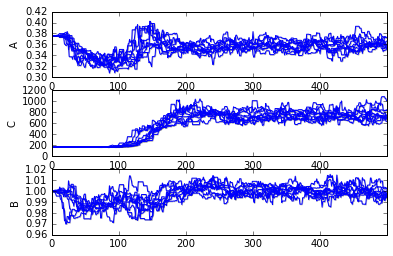

In [37]:
fig, (ax_A, ax_C, ax_B) = plt.subplots(3)
ax_A.set(ylabel='A')
ax_C.set(ylabel='C')
ax_B.set(ylabel='B')
for i in range(10):
    sns.tsplot(sampler.chain[i,:,0], ax=ax_A)
    sns.tsplot(sampler.chain[i,:,1], ax=ax_C)
    sns.tsplot(sampler.chain[i,:,2], ax=ax_B)
    
# Seems like it's fine enough to use the same initial guess. It took a while longer to settle on C though, so used 200 
# steps instead

In [39]:
samples = sampler.chain[:,200:,:]

# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T

# create a pandas DataFrame with labels
parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)
C_40 = q['C'][0.50]
print C_40

742.891952284


In [40]:
# Repeat for all other angles

# 60 Degrees
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_60, sig_y_60))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

samples = sampler.chain[:,200:,:]
# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T
# create a pandas DataFrame with labels.

parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)
C_60 = q['C'][0.50]


CPU times: user 1.33 s, sys: 20.4 ms, total: 1.35 s
Wall time: 1.53 s
Done


In [41]:
# 80 Degrees
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_80, sig_y_80))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

samples = sampler.chain[:,200:,:]
# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T
# create a pandas DataFrame with labels.

parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)
C_80 = q['C'][0.50]
print C_80

CPU times: user 1.56 s, sys: 29.8 ms, total: 1.59 s
Wall time: 1.88 s
Done
4123.89920036


In [42]:
# 100 Degrees
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_100, sig_y_100))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

samples = sampler.chain[:,200:,:]
# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T
# create a pandas DataFrame with labels

parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)
C_100 = q['C'][0.50]
print C_100

CPU times: user 1.41 s, sys: 20.6 ms, total: 1.43 s
Wall time: 1.47 s
Done
4970.06665409


In [43]:
# 120 Degrees
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_120, sig_y_120))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

samples = sampler.chain[:,200:,:]
# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T
# create a pandas DataFrame with labels.

parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)
C_120 = q['C'][0.50]
print C_120

CPU times: user 1.37 s, sys: 21.9 ms, total: 1.39 s
Wall time: 1.54 s
Done
4594.8300688


In [44]:
# 140 Degrees
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_140, sig_y_140))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

samples = sampler.chain[:,200:,:]
# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T
# create a pandas DataFrame with labels

parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)
C_140 = q['C'][0.50]
print C_140

CPU times: user 1.88 s, sys: 44.6 ms, total: 1.93 s
Wall time: 2.58 s
Done
5223.08066786


In [45]:
# 160 Degrees
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(tau, intensity_160, sig_y_160))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')

samples = sampler.chain[:,200:,:]
# reshape the samples into a 1D array where the colums are A, C, and B
traces = samples.reshape(-1, ndim).T
# create a pandas DataFrame with labels

parameter_samples = pd.DataFrame({'A': traces[0], 'C': traces[1], 'B': traces[2]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)
C_160 = q['C'][0.50]
print C_160

CPU times: user 1.37 s, sys: 18.1 ms, total: 1.39 s
Wall time: 1.43 s
Done
5263.73251395


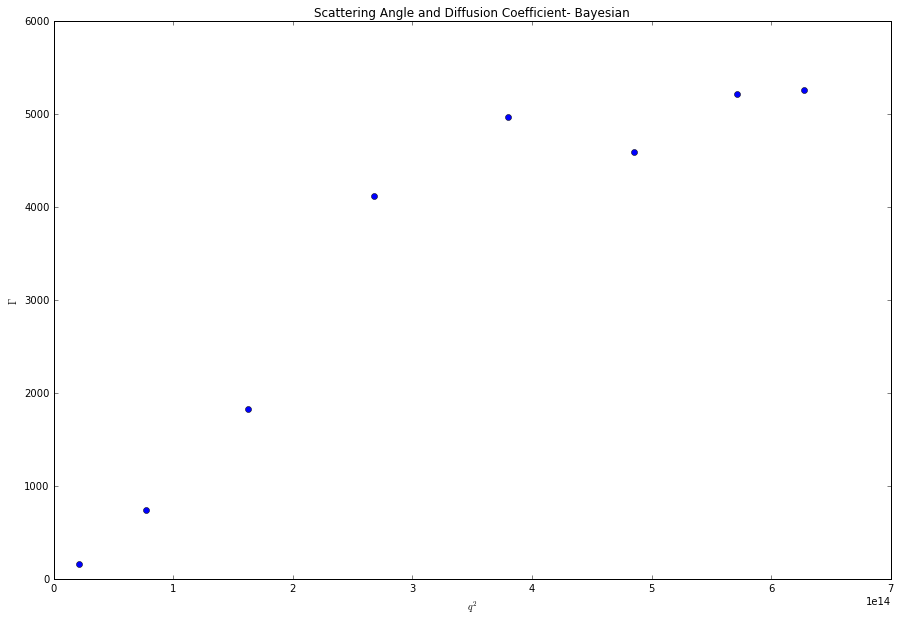

In [46]:
# Attempt to make a plot of linear relationship between q^2 and fit constant to find D

# Find q
q = ((4*np.pi * n) /(lam)) * np.sin(theta/2)

# Graph the extracted fits vs. q^2
bayes_fits = np.array([C_20, C_40, C_60, C_80, C_100, C_120, C_140, C_160])

fig = plt.figure(figsize = (15, 10))
plt.plot(q**2, bayes_fits, 'bo')
plt.xlabel(r'$q^2 $ ')
plt.ylabel(r'$\Gamma $')
plt.title("Scattering Angle and Diffusion Coefficient- Bayesian")

('best-fit parameters: ', array([  5.65481773e+02,   8.63828180e-12]))
covariance matrix: 
uncertainties:  [  5.26065939e+02   1.35599987e-12]


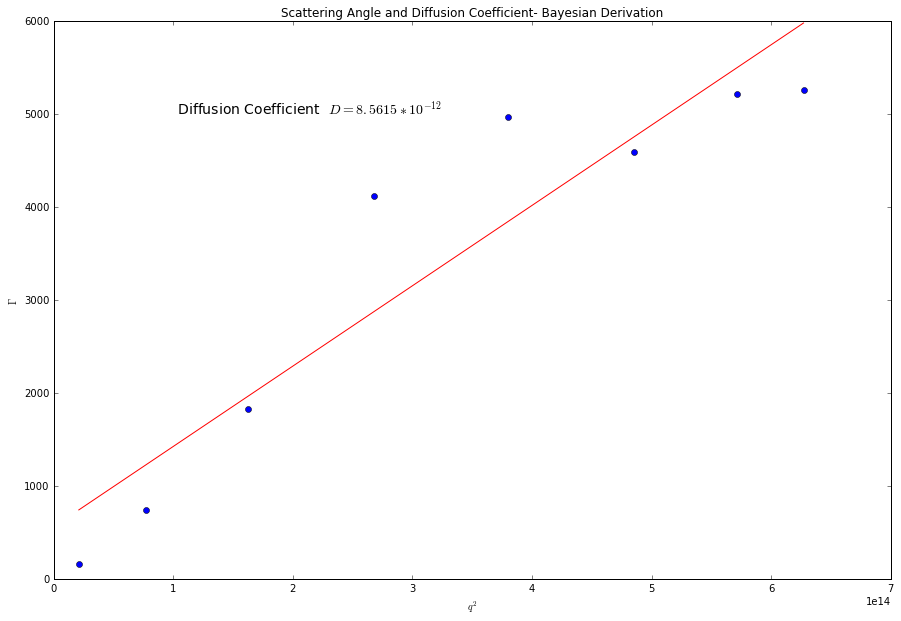

In [47]:
x = q**2
y = bayes_fits
popt, pcov = scipy.optimize.curve_fit(straight_line_model, x, y)
print('best-fit parameters: ', popt)
print('covariance matrix: ')
popt_uncertainties = np.sqrt(np.diag(pcov))
print 'uncertainties: ', popt_uncertainties

best_fit_line = straight_line_model(x, popt[0], popt[1])

fig = plt.figure(figsize = (15, 10))

plt.plot(x, y, 'bo')
plt.plot(x, best_fit_line, 'r')
plt.text(1e14, 5000, r' Diffusion Coefficient  $D = 8.5615*10^{-12}$', fontsize = 14)
plt.xlabel(r'$q^2 $ ')
plt.ylabel(r'$\Gamma $')
plt.title("Scattering Angle and Diffusion Coefficient- Bayesian Derivation")

In [48]:
# To find the radius, use the relationship D = kT/(6*pi*eta*R)

k = 1.38065e-23 # Boltzmann's constant, J/K (joules per kelvin)
T = 293.08 # Kelvin, roomtemp
eta = 10.016e-4 # viscosity of water, Pa s (pascal seconds) at temperature of 293.08 Kelvin
D = popt[1]

R = k*T / (6*np.pi*eta*D)
print "Radius: ", R

Radius:  2.48111545241e-08


In [ ]:
# This is not exactly the same as the least squares fit value of Radius = 2.46288536867e-08, but the percent difference
# is very small

In [49]:
# Move from this, which is only halfway Bayesian, to a full model of G(theta, tau)

# G(theta, tau) = A exp(-Dq(theta)^2 * tau)
# I need to extract D from all the data simultaneously 

# But in the mean time, fit the straight line use a Bayesian approach

# Assume a uniform uncertainty of +- 5%
sig_y = bayes_fits*0.05

def log_prior(theta):
    m, b = theta
    return 0
    
def log_likelihood(theta, x, y, sigma_y):
    m, b = theta
    residual = (y - m*x - b)**2
    chi_square = np.sum(residual/(sigma_y**2))
    constant = np.sum(np.log(1/np.sqrt(2.0*np.pi*sigma_y**2)))
    return constant - 0.5*chi_square

def log_posterior(theta, x, y, sigma_y):
    m, b = theta
    return log_prior(theta) + log_likelihood(theta, x, y, sigma_y)

In [52]:
# the model has 2 parameters; we'll use 50 walkers and 500 steps each
ndim = 2
nwalkers = 50
nsteps = 500

# set up the walkers in a "Gaussian ball" around the least-squares estimate
ls_result = [1.35599987e-12, 5.26065939e+02] 
starting_positions = [ls_result + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# set up the sampler object
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(x, y, sig_y))

%time sampler.run_mcmc(starting_positions, nsteps)
print('Done')


CPU times: user 784 ms, sys: 12.9 ms, total: 797 ms
Wall time: 830 ms
Done


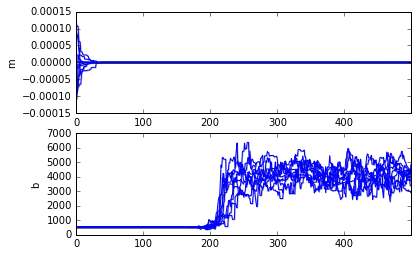

In [53]:
fig, (ax_m, ax_b) = plt.subplots(2)
ax_m.set(ylabel='m')
ax_b.set(ylabel='b')
for i in range(10):
    sns.tsplot(sampler.chain[i,:,0], ax=ax_m)
    sns.tsplot(sampler.chain[i,:,1], ax=ax_b)

In [54]:
samples = sampler.chain[:,100:,:]
traces = samples.reshape(-1, ndim).T
parameter_samples = pd.DataFrame({'m': traces[0], 'b': traces[1]})

q = parameter_samples.quantile([0.16,0.50,0.84], axis=0)

q

,b,m
0.16,526.068126,6.537635e-13
0.50,3667.475059,2.501326e-12
0.84,4574.997043,8.341999e-12


[  2.09987358e+13   7.68317431e+13   1.62902271e+14   2.68216436e+14
   3.79862997e+14   4.85177163e+14   5.71247691e+14   6.27080698e+14]
[  165.321        742.89195228  1833.20330773  4123.89920036  4970.06665409
  4594.8300688   5223.08066786  5263.73251395]


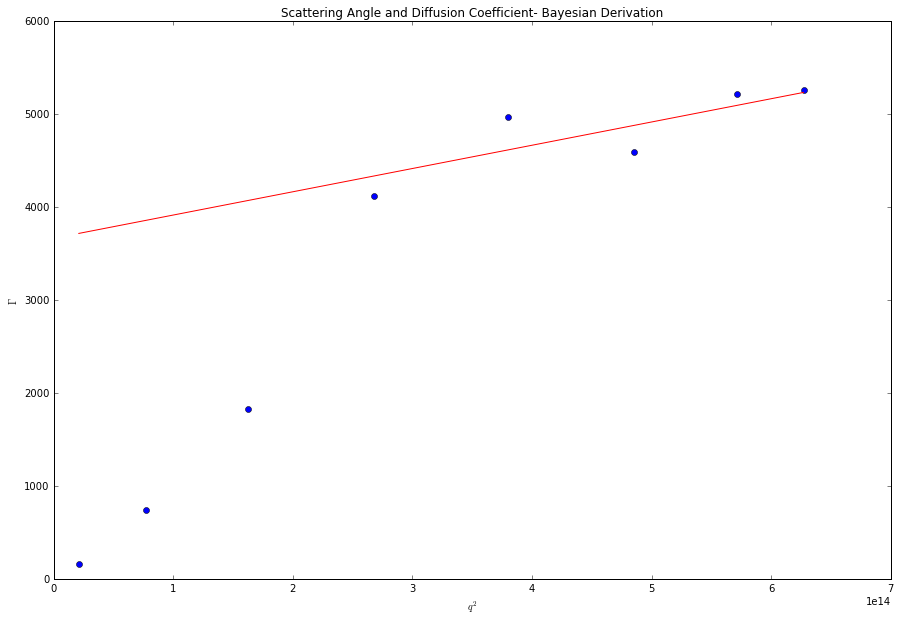

In [75]:
b = 3667.475
m = 2.5013e-12

q = ((4*np.pi * n) /(lam)) * np.sin(theta/2)

# Graph the extracted fits vs. q^2
bayes_fits = np.array([C_20, C_40, C_60, C_80, C_100, C_120, C_140, C_160])

x = q**2
y = bayes_fits

print x
print y

best_fit_line = straight_line_model(x, b, m)

fig = plt.figure(figsize = (15, 10))

plt.plot(x, y, 'bo')
plt.plot(x, best_fit_line, 'r')
#plt.text(1e14, 5000, r' Diffusion Coefficient  $D = 8.5615*10^{-12}$', fontsize = 14)
plt.xlabel(r'$q^2 $ ')
plt.ylabel(r'$\Gamma $')
plt.title("Scattering Angle and Diffusion Coefficient- Bayesian Derivation")

In [62]:
# That's really interesting... not sure where that's coming from

# Maybe try fitting again with a different guess?
# First check up on the graphs of the old ones, just to see if they make sense.



In [74]:
# Percent difference between each point on the graph

percent_diff_20 = (fits[0]-bayes_fits[0])/ (0.5*(fits[0]+bayes_fits[0]))
print "The percent difference for 20 degrees is " + str(percent_diff_20*100) + "%"

percent_diff_40 = (fits[1]-bayes_fits[1])/ (0.5*(fits[1]+bayes_fits[1]))
print "The percent difference for 40 degrees is " + str(percent_diff_40*100) + "%"

percent_diff_60 = (fits[2]-bayes_fits[2])/ (0.5*(fits[2]+bayes_fits[2]))
print "The percent difference for 60 degrees is " + str(percent_diff_60*100) + "%"

percent_diff_80 = (fits[3]-bayes_fits[3])/ (0.5*(fits[3]+bayes_fits[3]))
print "The percent difference for 80 degrees is " + str(percent_diff_80*100) + "%"
                                                                    
percent_diff_100 = (fits[4]-bayes_fits[4])/ (0.5*(fits[4]+bayes_fits[4]))
print "The percent difference for 100 degrees is " + str(percent_diff_100*100) + "%"
                                            
percent_diff_120 = (fits[5]-bayes_fits[5])/ (0.5*(fits[5]+bayes_fits[5]))
print "The percent difference for 120 degrees is " + str(percent_diff_120*100) + "%"
                                            
percent_diff_140 = (fits[6]-bayes_fits[6])/ (0.5*(fits[6]+bayes_fits[6]))
print "The percent difference for 140 degrees is " + str(percent_diff_140*100) + "%"

percent_diff_160 = (fits[7]-bayes_fits[7])/ (0.5*(fits[7]+bayes_fits[7]))
print "The percent difference for 160 degrees is " + str(percent_diff_160*100) + "%"

The percent difference for 20 degrees is 0.943667056567%
The percent difference for 40 degrees is 0.928978798456%
The percent difference for 60 degrees is 3.50523412846%
The percent difference for 80 degrees is 6.60269294808%
The percent difference for 100 degrees is 3.82031491468%
The percent difference for 120 degrees is 0.0955070559734%
The percent difference for 140 degrees is -1.35430903779%
The percent difference for 160 degrees is 3.54578357173%
